In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../dataset_music/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
print(df.columns.tolist())

['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [5]:
ddf = df.drop(columns='Unnamed: 0')

In [6]:
print(df.columns.tolist())

['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [7]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
#MEMBUAT LABEL MOOD

def classify_mood(row):
  if row['valence'] >= 0.5 and row ['energy'] >= 0.5:
    return 'Happy'
  elif row['valence'] < 0.5 and row['energy'] < 0.5:
    return 'Sad'
  elif row['valence'] >= 0.5 and row['energy'] < 0.5:
    return 'Calm'
  else:
    return 'Tense'

In [10]:
df['mood_label'] = df.apply(classify_mood, axis=1)

In [11]:
#fitur yang digunakan untuk melatih model
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness',
            'instrumentalness', 'loudness', 'speechiness']

In [12]:
X = df[features]
y = df['mood_label']

In [13]:
from sklearn.preprocessing import LabelEncoder

#encode label target
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
from sklearn.preprocessing import StandardScaler

#scaling data untuk svm
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(91199, 8) (22800, 8)


In [16]:
#svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1799
           1       0.99      0.99      0.99      8665
           2       0.99      0.99      0.99      4514
           3       0.99      0.99      0.99      7822

    accuracy                           0.99     22800
   macro avg       0.99      0.99      0.99     22800
weighted avg       0.99      0.99      0.99     22800



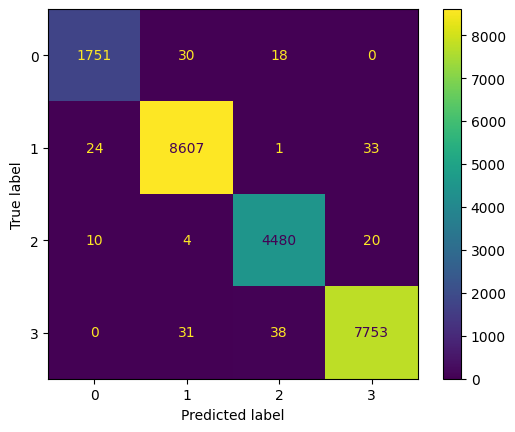

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, svm_pred)


In [18]:
#random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1799
           1       1.00      1.00      1.00      8665
           2       1.00      1.00      1.00      4514
           3       1.00      1.00      1.00      7822

    accuracy                           1.00     22800
   macro avg       1.00      1.00      1.00     22800
weighted avg       1.00      1.00      1.00     22800



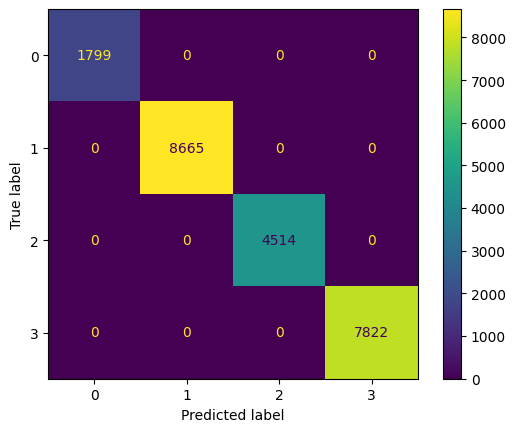

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)

In [19]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1799
           1       0.96      0.97      0.96      8665
           2       0.95      0.95      0.95      4514
           3       0.95      0.95      0.95      7822

    accuracy                           0.95     22800
   macro avg       0.94      0.93      0.94     22800
weighted avg       0.95      0.95      0.95     22800



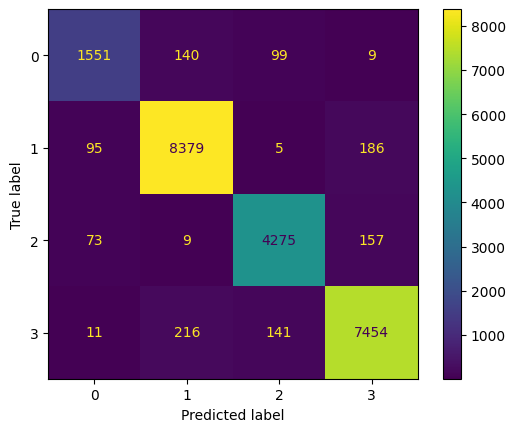

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred)